<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/neural-network-regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

> Indented block



There are difinitions for a regression problem but in our case, we're going to simplify it: predicting a neumerical variable based on some other combination of variables, evem shorter...predicting a number.

In [1]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

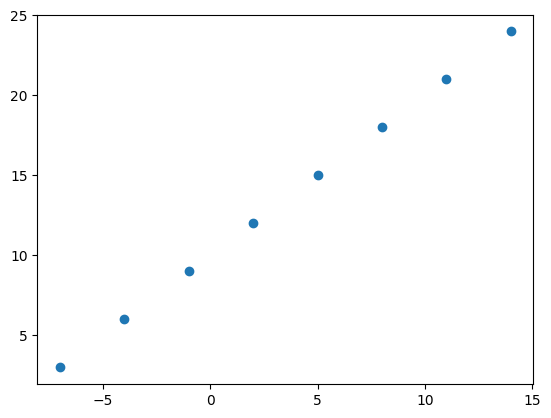

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# let's create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X = np.reshape(X, (-1, 1))
X

array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])

In [8]:
# turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creting a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
tf.random.set_seed(42)

In [10]:
# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 791ms/step - loss: 12.0420 - mae: 12.0420
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 11.9095 - mae: 11.9095
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.7770 - mae: 11.7770
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.6445 - mae: 11.6445
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 11.5120 - mae: 11.5120


## Getting prediction form the model

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 180ms/step


array([[10.106709]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increases the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model for more epochs (leave ot training for longer) or on more data (give the model more examples to learn from).

### Increasing number of epochs

In [12]:
# lets recreate the model
# Increasing the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 542ms/step - loss: 9.6415 - mae: 9.6415
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5090 - mae: 9.5090
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 9.3765 - mae: 9.3765
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.2440 - mae: 9.2440
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1115 - mae: 9.1115
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 8.9790 - mae: 8.9790
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 8.8465 - mae: 8.8465
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 8.7140 - mae: 8.7140
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.5815 - mae: 8.5815
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.4490 - mae: 8.4490
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - l

In [13]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# let's see if our model's predictino has improved
model.predict([17.0])

1/1 [==============================] - 0s 122ms/step


array([[30.24639]], dtype=float32)

### Adding more hidden units with activation function

In [15]:
# redefining the model but this time we are adding more hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 803ms/step - loss: 14.5754 - mae: 14.5754
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 14.1269 - mae: 14.1269
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6831 - mae: 13.6831
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 13.2414 - mae: 13.2414
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7997 - mae: 12.7997
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 12.3556 - mae: 12.3556
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9068 - mae: 11.9068
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 11.4511 - mae: 11.4511
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9861 - mae: 10.9861
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 10.5095 - mae: 10.5095
Epoch 11/100
1/1 [==============================

In [16]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# getting prediction from the model
model.predict([17.0])

1/1 [==============================] - 0s 198ms/step


array([[29.474415]], dtype=float32)

### Changing the optimizatino funciton

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.7102 - mae: 12.7102
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 11.9826 - mae: 11.9826
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 11.2569 - mae: 11.2569
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 10.5316 - mae: 10.5316
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.8035 - mae: 9.8035
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.0694 - mae: 9.0694
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.3263 - mae: 8.3263
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 7.5714 - mae: 7.5714
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 6.9172 - mae: 6.9172
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 6.9310 - mae: 6.9310
Epoch 11/100
1/1 [==============================] - 0s 35ms/ste

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 352ms/step


array([[25.792397]], dtype=float32)

**🧮🔑Important🔑🧮:** Common ways to improve a deep learning model

*   Adding layers.
*   Increase the number of hidden units.
*   Change the activation function.
*   Change the optimizatino function.
*   Change the learning rate.
*   Fitting on more data.



### Adding more data

It is good idea to visualize:

*  The data - What data are we working with? What does it look like?
*  The model itself - What does our model look like?
*  The training of a model - How does a model performs while it learns?
*  The predictions of the model - How do the prediction of the model line up against the ground truth (the original labels).

In [20]:
# making a bigger dataset
features = tf.range(-100, 100, 4)
labels = features + 10
features, labels

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

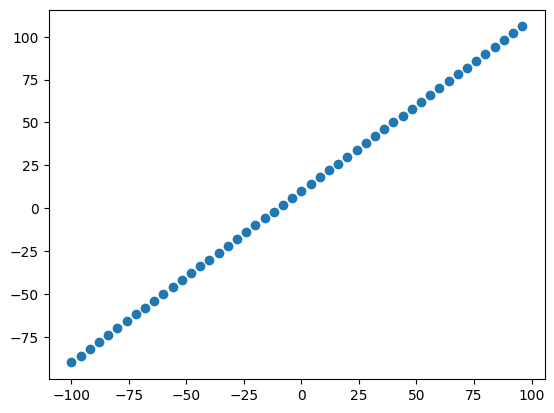

In [21]:
plt.scatter(features, labels)

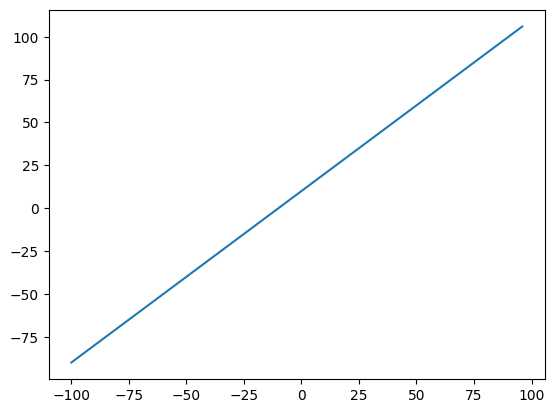

In [22]:
plt.plot(features, labels)

In [23]:
features = tf.reshape(features, shape=(50,1))
features

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [24]:
# split the data into train and test set
x_train = features[:40, :1]
y_train = labels[:40]

x_test = features[40:, :1]
y_test = labels[40:]

In [25]:
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

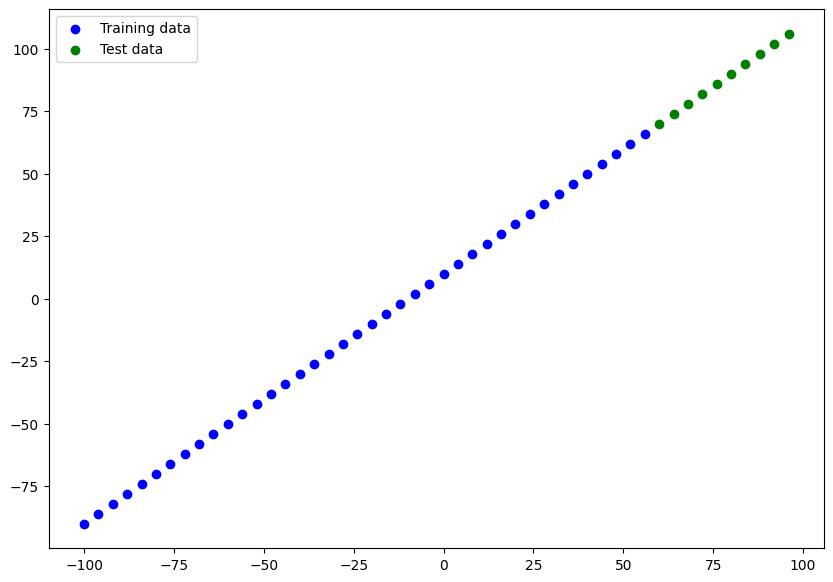

In [26]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# plot test data
plt.scatter(x_test, y_test, c='g', label='Test data')
# show the legend
plt.legend()

## Training a neural network

In [27]:
tf.shape(x_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([40,  1], dtype=int32)>

In [28]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='neural_network')

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🧮🔑**Note:**🔑🧮
*  Total params: Total number of parameters in the model.
*  Trainable parameters: These are the parameters (paterns) the model can update as it trains.
*  Non-trainable params: These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer Learning**).


**Complete details about trainable parameters within a layer:**

📖**Resource:** [https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv)

In [30]:
# fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 24ms/step - loss: 94.0239 - mae: 94.0239
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 27.6848 - mae: 27.6848
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 20.6174 - mae: 20.6174
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 13.3520 - mae: 13.3520
Epoch 5/100
2/2 [==============================] - 0s 63ms/step - loss: 17.5345 - mae: 17.5345
Epoch 6/100
2/2 [==============================] - 0s 65ms/step - loss: 10.2570 - mae: 10.2570
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 11.2446 - mae: 11.2446
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 11.1607 - mae: 11.1607
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 40.8544 - mae: 40.8544
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 28.1948 - mae: 28.1948
Epoch 11/100
2/2 [==============================]

## Evaluating model

In [31]:
from tensorflow.keras.utils import plot_model

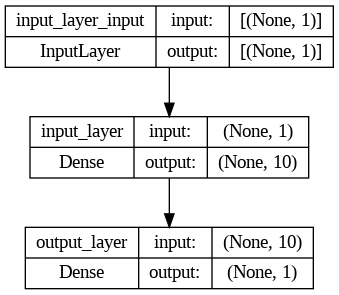

In [32]:
plot_model(model, show_shapes=True)

### Visualizing our models predictions

In [33]:
# make some prediction
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 102ms/step


array([[ 76.321144],
       [ 81.29353 ],
       [ 86.26593 ],
       [ 91.23832 ],
       [ 96.21071 ],
       [101.18309 ],
       [106.15549 ],
       [111.12788 ],
       [116.10026 ],
       [121.072655]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
# let's create a ploting function
def plot_prediction(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # plot models prediction in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # show legend
  plt.legend()

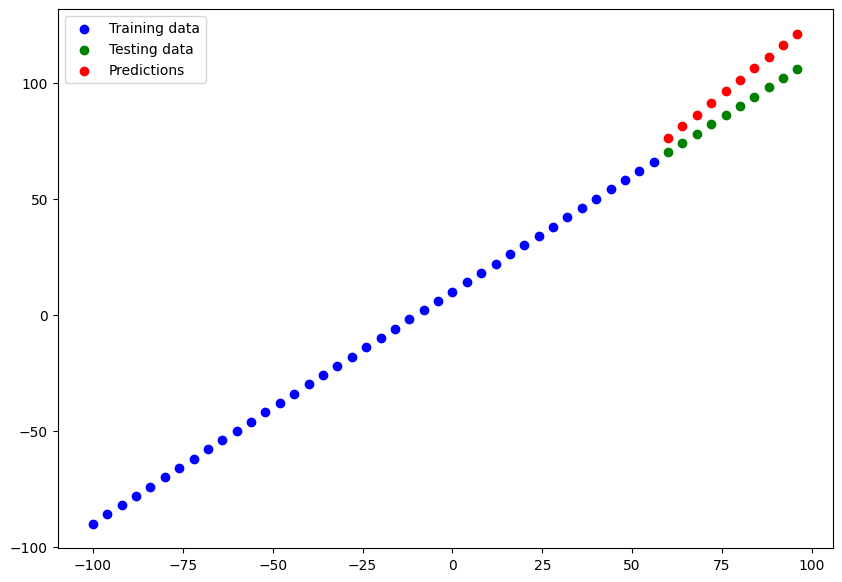

In [36]:
plot_prediction()

### Evaluating models predictions with regression evaluation metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model.

Since we're working on a regression problem, there are two main metrics:

*  MAE - mean absolute error, "on average, how wrong is each of my model's prediction"
*  MSE - mean square error, "square the average errors"

In [37]:
# evaluate the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 377ms/step - loss: 10.6969 - mae: 10.6969


[10.696901321411133, 10.696901321411133]

In [38]:
# converting y_pred into tensor
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.321144],
       [ 81.29353 ],
       [ 86.26593 ],
       [ 91.23832 ],
       [ 96.21071 ],
       [101.18309 ],
       [106.15549 ],
       [111.12788 ],
       [116.10026 ],
       [121.072655]], dtype=float32)>

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [40]:
# as the shapes of y_test and y_pred is different we have to change the shape of y_pred into (10,)
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.321144,  81.29353 ,  86.26593 ,  91.23832 ,  96.21071 ,
       101.18309 , 106.15549 , 111.12788 , 116.10026 , 121.072655],
      dtype=float32)>

In [41]:
y_pred.shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

In [42]:
# calculate the mean absolute error
mae = tf.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.6969>

In [43]:
# calcualte the mean squared error
mse = tf.losses.MSE(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=122.22439>

In [44]:
# making a function to use MAE and MSE
def mae(y_true, y_pred):
  return tf.losses.MAE(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

### One layer with 100 epochs

In [45]:
# set random seed
tf.random.set_seed(42)

# creating a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mae'])

# fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 110.5400 - mae: 110.5400
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 75.0845 - mae: 75.0845
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 37.5186 - mae: 37.5186
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 8.1179 - mae: 8.1179
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 10.7753 - mae: 10.7753
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.9700 - mae: 9.9700
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0260 - mae: 9.0260
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.1142 - mae: 9.1142
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 19.8305 - mae: 19.8305
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7379 - mae: 10.7379
Epoch 11/100
2/2 [==============================] - 0s 1

1/1 [==============================] - 0s 169ms/step


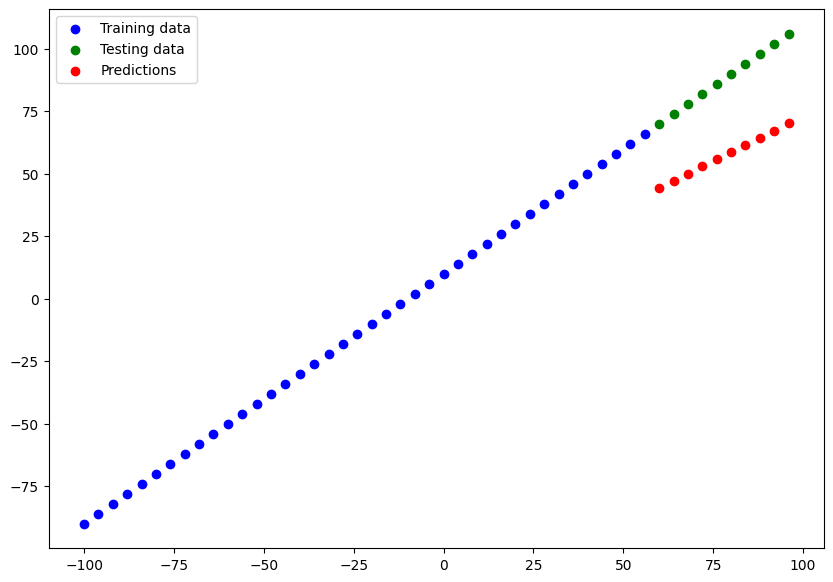

In [46]:
# make and plot predictions of our model
y_preds_1 = model_1.predict(x_test)
plot_prediction(predictions=y_preds_1)

In [47]:
# calculate model_1 evaluatino metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.753101>,
 <tf.Tensor: shape=(), dtype=float32, numpy=956.26495>)

### Two dense layers with 100 epochs

In [48]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mse'])

# fit the model
model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 27ms/step - loss: 22.7205 - mse: 1087.5367
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 23.3796 - mse: 777.0370
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 28.4256 - mse: 1215.9285
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 16.2689 - mse: 374.2570
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 18.8242 - mse: 508.4614
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 14.1829 - mse: 284.7175
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 11.4816 - mse: 160.5077
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2294 - mse: 175.3105
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 41.9478 - mse: 2806.3127
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 29.1520 - mse: 1201.7351
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 51ms/step


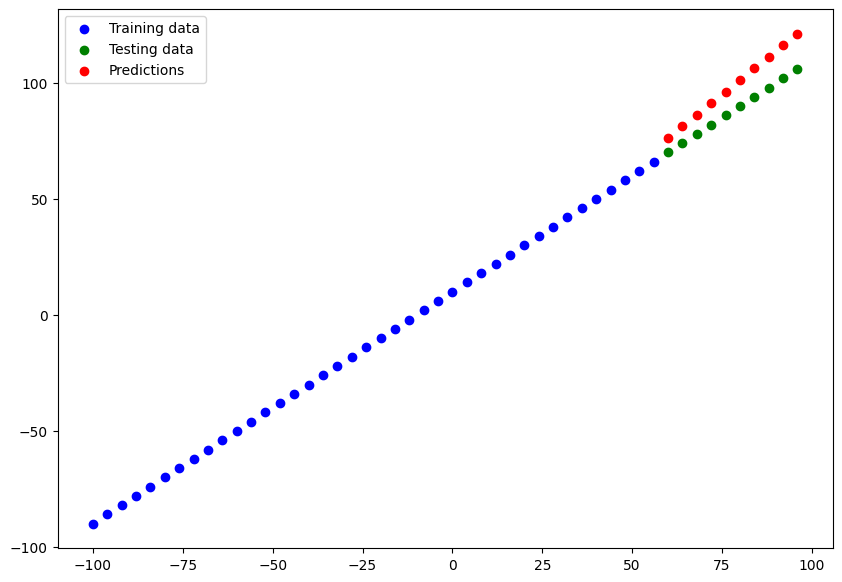

In [49]:
# making predictino and ploting results
y_preds_2 = model_2.predict(x_test)

# ploting the predictions
plot_prediction(predictions=y_preds_2)

In [50]:
# calculating the evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.77001>,
 <tf.Tensor: shape=(), dtype=float32, numpy=123.84906>)

### Two layers with 500 epochs

In [51]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=['mse'])

# fit the model
model_3.fit(x_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 51ms/step


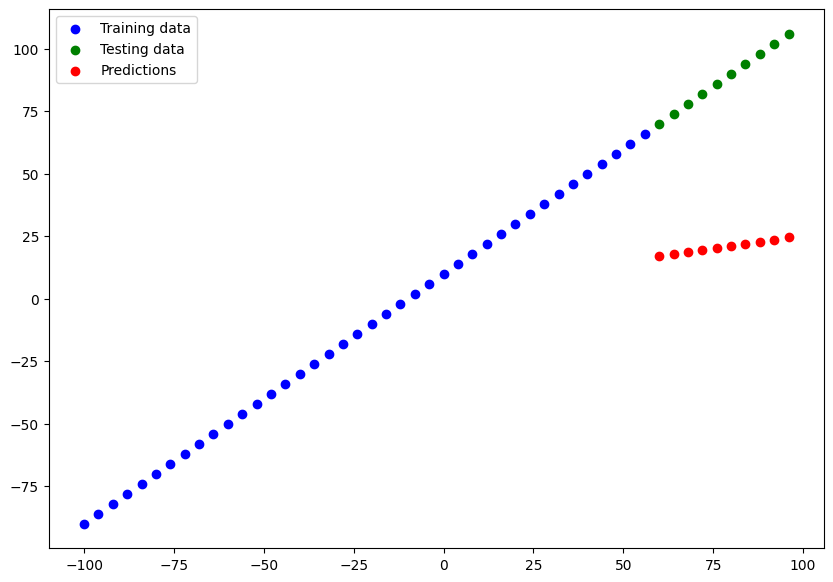

In [52]:
# making predictino and ploting results
y_preds_3 = model_3.predict(x_test)

# ploting the predictions
plot_prediction(predictions=y_preds_3)

In [53]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.20289>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4599.0913>)

## Compareing the results of our experiments

In [54]:
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,30.753101,956.264954
1,model_2,10.770010,123.849060
2,model_3,67.202888,4599.091309


**Tracking our experiments**

One really good habit in machine learning modelling is to track the results of our experiments.
Luckily, there are tools to help us!

📖**Resource:** As we build more models, we will want to look into using:
*   TensorBoard - A component of the tensorFlow library to help track modelling experiments (we'll see this one later).
*   Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving trained model

Saving our model allows up to use them outside of Google Colab (or wherever they were trained)

There are two main format we can save our models:
*   The SavedModel format.
*   The HDF5 format.



In [55]:
# saving model using the SavedModel format
model_2.save('best_model_SaveModel_format')

In [56]:
# saving model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## loading in a saved model

### SavedModel format

In [57]:
# load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SaveModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [58]:
# compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)

# comparing the MAE score
(mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)).numpy()

1/1 [==============================] - 0s 54ms/step


True

In [59]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### HDF5 format

In [60]:
# load in the HDF5 format model
loaded_HDF5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_HDF5_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# compare model_2 predictions with HDF5 format model predictions
model_2_preds = model_2.predict(x_test)
loaded_HDF5_format_preds = loaded_HDF5_format.predict(x_test)

# comparing the MAE score
(mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_HDF5_format_preds)).numpy()

1/1 [==============================] - 0s 55ms/step


True

In [62]:
model_2_preds == loaded_HDF5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model form Google Colab

In [63]:
from google.colab import files

In [64]:
files.download('best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# save a file from google colab to google drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [66]:
!ls /content/drive/MyDrive

 best_model_HDF5_format.h5   Datasets			 'TensorFlow Learnings'
'Colab Notebooks'	    'Emotion Detection Project'  'Trained Models'
'CSE 499'		    'Presentation Files'
'CV and Cover Letter'	     Signature


# A larger example

> Applying Neural Network on insurence dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [68]:
# reading in the insurance dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
len(dataset)

1338

In [70]:
# let's try one-hot encode our DataFrame so it's all numbers
dataset_onehot = pd.get_dummies(dataset)
dataset_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Creating training and test set

In [71]:
features = dataset_onehot.drop('charges', axis=1)
labels = dataset_onehot['charges']

In [72]:
features.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [73]:
labels.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [75]:
len(x_train), len(y_train)

(1070, 1070)

In [76]:
len(x_test), len(y_test)

(268, 268)

## Building a neural network to train

In [77]:
tf.random.set_seed(42)

# create a model
insurence_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurence_model.compile(loss=tf.losses.mae,
                        optimizer=tf.optimizers.SGD(),
                        metrics=['mae'])

# fit the model
insurence_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8642.8789 - mae: 8642.8789
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7882.6675 - mae: 7882.6675
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7554.2788 - mae: 7554.2788
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7782.1318 - mae: 7782.1318
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7762.4663 - mae: 7762.4663
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7564.4395 - mae: 7564.4395
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7574.4438 - mae: 7574.4438
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7809.1973 - mae: 7809.1973
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7494.5562 - mae: 7494.5562
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7488.3486 - mae: 7488.3486

## Checking the model on insurence data

In [78]:
insurence_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7084.0845 - mae: 7084.0845


[7084.08447265625, 7084.08447265625]

In [79]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Running experiments on model to improve

Right now it looks like our model isn't performing too well...let's try and improve it!

>To (try) improve our model, we will run two experiments:

>   1. Add extra layers with more hidden units with Adam optimizer.
>   2. Train for longer.

Adding extra layers and changing optimizer

In [80]:
tf.random.set_seed(42)

# create a model
insurence_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurence_model_2.compile(loss=tf.losses.mae,
                        optimizer=tf.optimizers.Adam(),
                        metrics=['mae'])

# fit the model
insurence_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13263.4365 - mae: 13263.4365
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13064.0742 - mae: 13064.0742
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12680.7461 - mae: 12680.7461
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11970.5068 - mae: 11970.5068
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10820.9629 - mae: 10820.9629
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9390.0615 - mae: 9390.0615
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8105.1562 - mae: 8105.1562
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7506.7271 - mae: 7506.7271
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7414.2227 - mae: 7414.2227
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7394.7476 - mae:

In [81]:
insurence_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4784.6514 - mae: 4784.6514


[4784.6513671875, 4784.6513671875]

Train for longer

In [82]:
tf.random.set_seed(42)

# create a model
insurence_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurence_model_3.compile(loss=tf.losses.mae,
                        optimizer=tf.optimizers.Adam(),
                        metrics=['mae'])

# fit the model
history = insurence_model_3.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13274.3584 - mae: 13274.3584
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13087.2100 - mae: 13087.2100
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12705.5684 - mae: 12705.5684
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 11979.2061 - mae: 11979.2061
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10805.0000 - mae: 10805.0000
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9361.6992 - mae: 9361.6992
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8087.1318 - mae: 8087.1318
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7519.6167 - mae: 7519.6167
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7433.2881 - mae: 7433.2881
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7414.3872 - mae:

In [83]:
# evaluate our third model
insurence_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3502.3416 - mae: 3502.3416


[3502.341552734375, 3502.341552734375]

Text(0.5, 0, 'epochs')

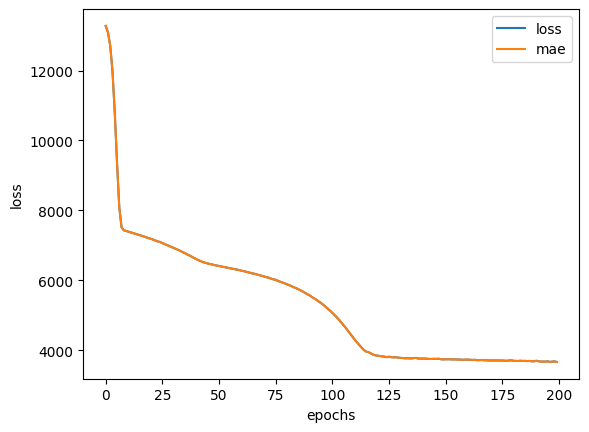

In [84]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Question:** How long should we train our model?

It depends on the problem we are working on. However, many people have asked this question before.....so tensorflow has a solution! It's called the [**Early Stopping Callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), Which is a tensorflow component we can add to our model to stop training once it stops improving a certain metric.

# Preprocessing Data (Normalization and Standardization)

In terms of scalling values, neural networks tend to prefer **Normalization**. But, we can try both and see which one performs better.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# reading the insurence dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='Frequency'>

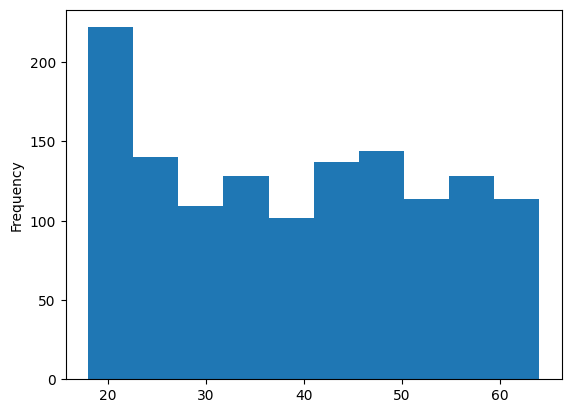

In [86]:
dataset['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

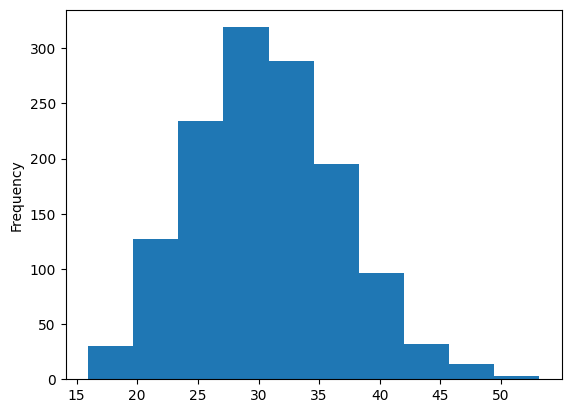

In [87]:
dataset['bmi'].plot(kind='hist')

<Axes: >

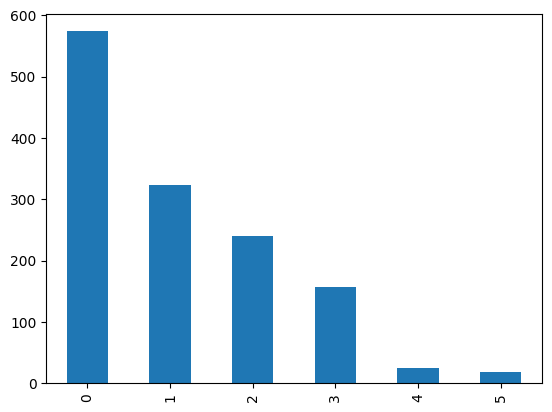

In [88]:
(dataset['children'].value_counts()).plot(kind='bar')

In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [91]:
# create a column transformer
ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                             (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))

# creating x and y values
x = dataset.drop('charges', axis=1)
y = dataset['charges']

# creating train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(x_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [92]:
# what does our data looks like now?
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [94]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [95]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

### Building a Neural Network to train

In [96]:
tf.random.set_seed(42)

# create the model
insurence_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurence_model_4.compile(loss=tf.losses.mae,
                                    optimizer=tf.optimizers.Adam(),
                                    metrics=['mae'])

# fit the model
history = insurence_model_4.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.3008 - mae: 13343.3008
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.7676 - mae: 13333.7676
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13310.8252 - mae: 13310.8252
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13263.7236 - mae: 13263.7236
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13181.4766 - mae: 13181.4766
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13053.2930 - mae: 13053.2930
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12868.8643 - mae: 12868.8643
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12618.0527 - mae: 12618.0527
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12290.7197 - mae: 12290.7197
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11884.22

Text(0, 0.5, 'losses')

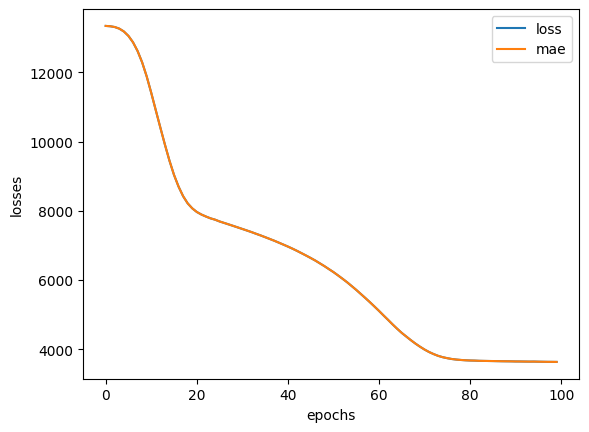

In [99]:
# ploting the train curve
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('losses')

In [100]:
# evaluate our insurence model trained on normalized data
insurence_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3436.3159 - mae: 3436.3159


[3436.31591796875, 3436.31591796875]

>We can see that scaling the dataset columns makes the loss significantly less then insurence model 2.